In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import re
plt.rcParams['pdf.fonttype'] = 42


In [10]:
response = requests.get('https://h1bsalary.online/greencard_count_by_university.php')
doc = BeautifulSoup(response.text)

In [11]:
table = doc.table.tbody.findAll('tr')

rows = []
for item in table:
    row = {}
    row['institution'] = item.td.find_next_sibling('td').text
    row['url'] = item.td.find_next_sibling('td').a['href']
    row['average_salery'] = item.td.find_next_sibling('td').find_next_sibling('td').text
    row['applications'] = average_salery = item.td.find_next_sibling('td').find_next_sibling('td').find_next_sibling('td').text
    rows.append(row)

df = pd.DataFrame(rows)

In [12]:
df['url'] = df.url.str.strip('.')

In [14]:
def get_info(dataset):
    rows = []
    for info in dataset.url:
        url = 'https://h1bsalary.online' + info
        print(url)
        response = requests.get(url)
        doc = BeautifulSoup(response.text)
        table = doc.find('table', id = 'lcasalary').tbody.findAll('tr')
        for item in table:
            row = {}
            td = item.findAll('td')
            row['index'] = td[0].text
            row['institution'] = td[1].text
            row['field_of_study'] = td[2].text
            row['grad_year'] = td[3].text
            row['employer'] = td[4].text
            row['job_title'] = td[5].text
            row['wage'] = td[6].text
            row['decision_date'] = td[7].text
            row['worksite'] = td[8].text
            row['country'] = td[9].text
            row['more_info'] = td[10].a['href']
            rows.append(row)
    return pd.DataFrame(rows)


In [13]:
df['url'] = df.url.str.replace(' ', '%20')

In [15]:
info = get_info(df)

https://h1bsalary.online/searchby_university.php?searchtext_college=JAWAHARLAL%20NEHRU%20TECHNOLOGICAL%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=ANNA%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=UNIVERSITY%20OF%20MADRAS
https://h1bsalary.online/searchby_university.php?searchtext_college=OSMANIA%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=UNIVERSITY%20OF%20SOUTHERN%20CALIFORNIA
https://h1bsalary.online/searchby_university.php?searchtext_college=UNIVERSITY%20OF%20PUNE
https://h1bsalary.online/searchby_university.php?searchtext_college=UNIVERSITY%20OF%20MUMBAI
https://h1bsalary.online/searchby_university.php?searchtext_college=CARNEGIE%20MELLON%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=ANDHRA%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=VISVESWARAIAH%20TECHNOLOGICAL%20UNIVERSITY,%20BELGAUM
https://h1bsala

https://h1bsalary.online/searchby_university.php?searchtext_college=INDIANA%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=KURUKSHETRA%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=ROCHESTER%20INSTITUTE%20OF%20TECHNOLOGY
https://h1bsalary.online/searchby_university.php?searchtext_college=BOSTON%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=UNIVERSITY%20OF%20ILLINOIS
https://h1bsalary.online/searchby_university.php?searchtext_college=TEXAS%20TECH%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=NORTHWESTERN%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=PONDICHERRY%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=THE%20UNIVERSITY%20OF%20MICHIGAN
https://h1bsalary.online/searchby_university.php?searchtext_college=NEW%20YORK%20INSTITUTE%20OF%20TECHNOLOGY
https://h1bsalary.online/searchby_un

https://h1bsalary.online/searchby_university.php?searchtext_college=NEW%20MEXICO%20STATE%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=SOUTHERN%20ILLINOIS%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=THE%20UNIVERSITY%20OF%20ARIZONA
https://h1bsalary.online/searchby_university.php?searchtext_college=UNIVERSITY%20OF%20MASSACHUSETTS
https://h1bsalary.online/searchby_university.php?searchtext_college=JADAVPUR%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=TSINGHUA%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=UNIVERSITY%20OF%20KENTUCKY
https://h1bsalary.online/searchby_university.php?searchtext_college=ANNA%20UNIVERSITY,%20CHENNAI
https://h1bsalary.online/searchby_university.php?searchtext_college=INDIAN%20INSTITUTE%20OF%20TECHNOLOGY
https://h1bsalary.online/searchby_university.php?searchtext_college=MANGALORE%20UNIVERSITY
https://h1bsalary.online/sear

https://h1bsalary.online/searchby_university.php?searchtext_college=UNIVERSITY%20OF%20UTAH
https://h1bsalary.online/searchby_university.php?searchtext_college=BANARAS%20HINDU%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=THE%20UNIVERSITY%20OF%20WATERLOO
https://h1bsalary.online/searchby_university.php?searchtext_college=UNIVERSITY%20OF%20CALIFORNIA,%20SANTA%20BARBARA
https://h1bsalary.online/searchby_university.php?searchtext_college=WESTERN%20ILLINOIS%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=BIRLA%20INSTITUTE%20OF%20TECHNOLOGY%20&%20SCIENCE
https://h1bsalary.online/searchby_university.php?searchtext_college=UNIVERSITY%20OF%20NORTH%20CAROLINA%20AT%20CHARLOTTE
https://h1bsalary.online/searchby_university.php?searchtext_college=YONSEI%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=ALAGAPPA%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=FUDAN%20UNI

https://h1bsalary.online/searchby_university.php?searchtext_college=FLORIDA%20INSTITUTE%20OF%20TECHNOLOGY
https://h1bsalary.online/searchby_university.php?searchtext_college=KOREA%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=OKLAHOMA%20CITY%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=UNIVERSITY%20OF%20ILLINOIS%20AT%20SPRINGFIELD
https://h1bsalary.online/searchby_university.php?searchtext_college=INDIAN%20INSTITUTE%20OF%20TECHNOLOGY%20KHARAGPUR
https://h1bsalary.online/searchby_university.php?searchtext_college=ST.%20CLOUD%20STATE%20UNIVERSITY
https://h1bsalary.online/searchby_university.php?searchtext_college=ST.%20JOHN
https://h1bsalary.online/searchby_university.php?searchtext_college=UNIVERSITY%20OF%20CALGARY
https://h1bsalary.online/searchby_university.php?searchtext_college=UNIVERSITY%20OF%20MASSACHUSETTS%20AMHERST
https://h1bsalary.online/searchby_university.php?searchtext_college=DOCTOR%20BHIMRAO%20AMBEDKAR

In [18]:
info.head()

,country,decision_date,employer,field_of_study,grad_year,index,institution,job_title,more_info,wage,worksite
0,INDIAH-1B,2019-05-22,COOLSOFT LLC,ELECTRONICS & COMMUNICATION ENGINEERING,2002,421,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,Sr. Quality Assurance Engineer,./extended_perm_data.php?PermID=2402855,87526.00 - 0.00/Year,"Louisville,KY"
1,INDIAH-1B,2019-05-21,"INNOVA SOLUTIONS, INC.",INFORMATION TECHNOLOGY,2008,314,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,Software Developer,./extended_perm_data.php?PermID=2401316,95638.00 - 0.00/Year,"Santa Clara,CA"
2,INDIAH-1B,2019-05-20,ORPINE INC,ELECTRONICS ENGINEERING,2006,137,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,Senior Software Engineer,./extended_perm_data.php?PermID=2401266,125400.00 - 0.00/Year,"Alpharetta,GA"
3,INDIAL-1,2019-05-15,"ADVANCED MICRO DEVICES, INC. (AMD)",COMPUTER ENGINEERING,2013,22,"JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY, HYD...",Member of Technical Staff (MTS) Silicon Design...,./extended_perm_data.php?PermID=2403622,150106.00 - 200200.00/Year,"Santa Clara,CA"
4,INDIAH-1B,2019-05-15,BEST IT DEAL INC,MECHANICAL ENGINEERING,2002,44,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,Sr. SAP Basis Administrator & Architect,./extended_perm_data.php?PermID=2405412,141000.00 - 0.00/Year,"Piscataway,NJ"


In [19]:
info.shape

(174172, 11)

In [21]:
import pycountry

countries = []
for x in list(pycountry.countries):
    countries.append(x.name.upper())

countries.extend(['SOUTH KOREA', 'RUSSIA', 'BOLIVIA', 'TAIWAN', 'VIETNAM', 'VENEZUELA'])


In [22]:
# info_df.country.str.extract("(" + "|".join(countries) +")(.+)").iloc[:, [0, 6]]
info['visa'] = info.country.str.extract("(" + "|".join(countries) +")(.+)").iloc[:, 6]
info['country_name'] = info.country.str.extract("(" + "|".join(countries) +")").iloc[:, 0].str.title()


In [23]:
info['wage_type'] = info.wage.str.extract('.+/(.+)')

In [24]:
info.wage.str.extract('(.+)/.+', expand = False).str.replace(',', '').head()

0          87526.00 - 0.00
1          95638.00 - 0.00
2         125400.00 - 0.00
3    150106.00 - 200200.00
4         141000.00 - 0.00
Name: wage, dtype: object

In [26]:
info[['worksite_city', 'worksite_state']] = info.worksite.str.extract('(.+),(.+)')

In [28]:
info[['wage_range1', 'wage_range2']] = info.wage.str.extract('(.+)/.+', expand = False).str.replace(',', '').str.extract('(.+) - (.+)')

In [29]:
info_cleaned = info[['index', 
                      'visa', 
                      'country_name', 
                      'decision_date', 
                      'employer', 
                      'job_title', 
                      'worksite_city', 
                      'worksite_state', 
                      'wage_range1', 
                      'wage_range2',
                      'wage_type',
                      'institution', 
                      'grad_year', 
                      'field_of_study', 
                      'more_info']]

In [30]:
info_cleaned.to_csv('green_card_info_cleaned.csv')

In [2]:
df = pd.read_csv('green_card_info_cleaned.csv')

In [104]:
temp = df.country_name.value_counts().head(10).reset_index()
temp.columns = ['country', 'count']

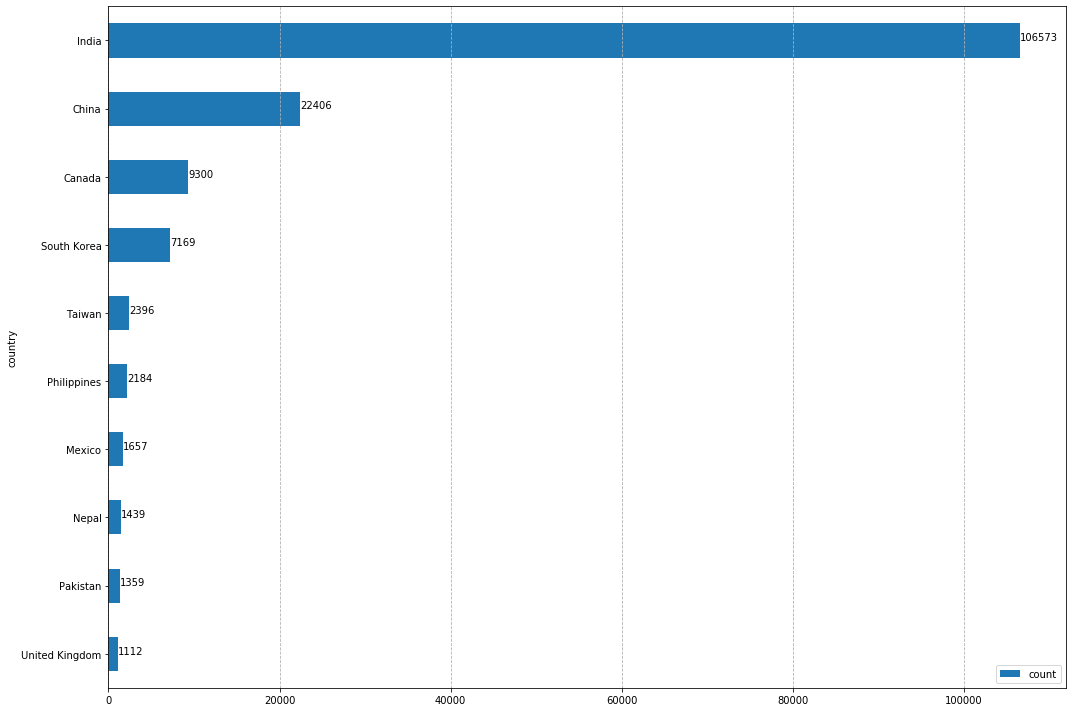

In [108]:
ax = temp.sort_values('count', ascending = True).plot(x = 'country', y = 'count', kind = 'barh', figsize = (15, 10))
ax.grid(axis = 'x', linestyle = '--')
for i, v in enumerate(temp.sort_values('count', ascending = True)['count']):
    ax.text(v  , i  , str(v))
plt.tight_layout()
plt.savefig("gc_top20.pdf")

In [56]:
geocoded = pd.read_csv('country_geocoded.csv')

In [76]:
country_count = df.country_name.value_counts().reset_index()
country_count.columns = ['country', 'count']

In [77]:
merged = country_count.merge(geocoded,  left_on = 'country', right_on = 'Country', how = 'left')

In [58]:
merged = df.merge(geocoded, left_on = 'country_name', right_on = 'Country', how = 'left')

In [79]:
merged.to_csv('green_card_with_coord.csv')

In [78]:
merged.head()

,country,count,Country,Latitude,Longitude
0,India,106573,India,20.593684,78.962880
1,China,22406,China,35.861660,104.195397
2,Canada,9300,Canada,56.130366,-106.346771
3,South Korea,7169,South Korea,35.907757,127.766922
4,Taiwan,2396,Taiwan,23.697810,120.960515


In [149]:
temp = df.worksite_state.value_counts().reset_index()
temp.columns = ['state', 'count']

In [150]:
state = pd.read_csv('states_coord.csv')
state.head()
state.columns = ['state', 'latitude', 'longitude', 'name']

In [151]:
state = temp.merge(state, left_on = 'state', right_on = 'state', how = 'left')

In [155]:
state = state[:55]

In [156]:
state.to_csv('state.csv')

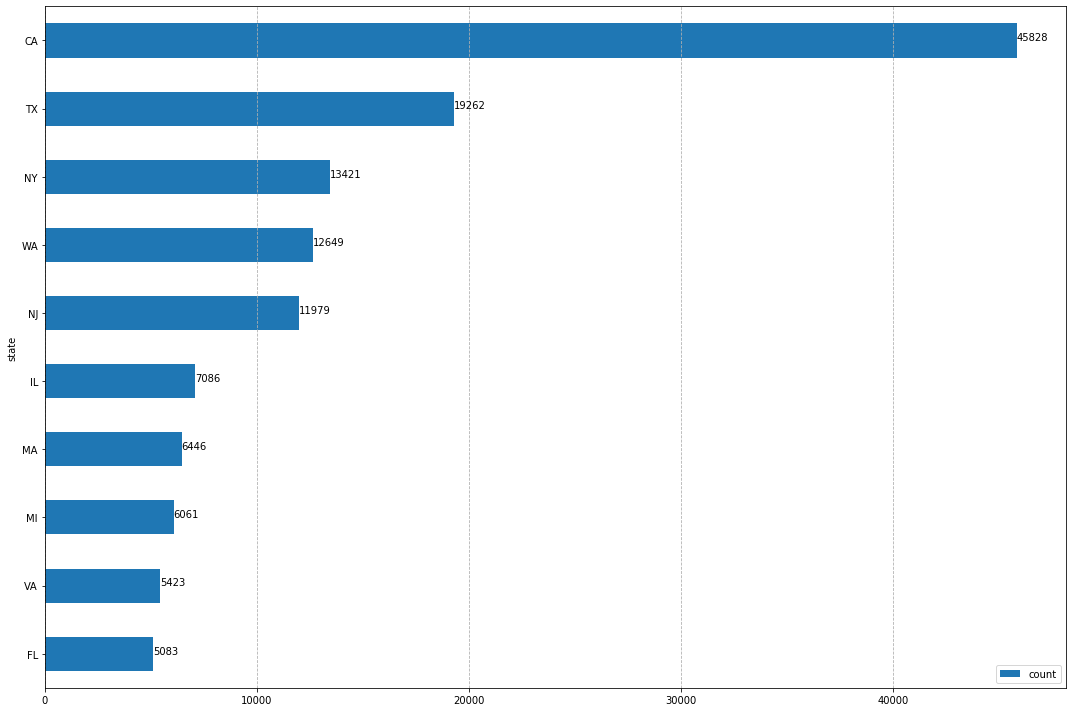

In [165]:
temp = temp.head(10)
ax = temp.sort_values('count', ascending = True).plot(kind = 'barh', x = 'state', y = 'count',figsize = (15, 10))
ax.grid(axis = 'x', linestyle = '--')
for i, v in enumerate(temp.sort_values('count', ascending = True)['count']):
    ax.text(v  , i  , str(v))
plt.tight_layout()
plt.savefig("state_10.pdf")



In [161]:
temp

,state,count
0,CA,45828
1,TX,19262
2,NY,13421
3,WA,12649
4,NJ,11979
5,IL,7086
6,MA,6446
7,MI,6061
8,VA,5423
9,FL,5083


In [3]:
df

,Unnamed: 0,index,visa,country_name,decision_date,employer,job_title,worksite_city,worksite_state,wage_range1,wage_range2,wage_type,institution,grad_year,field_of_study,more_info
0,0,421,H-1B,India,2019-05-22,COOLSOFT LLC,Sr. Quality Assurance Engineer,Louisville,KY,87526.00,0.0,Year,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,2002,ELECTRONICS & COMMUNICATION ENGINEERING,./extended_perm_data.php?PermID=2402855
1,1,314,H-1B,India,2019-05-21,"INNOVA SOLUTIONS, INC.",Software Developer,Santa Clara,CA,95638.00,0.0,Year,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,2008,INFORMATION TECHNOLOGY,./extended_perm_data.php?PermID=2401316
2,2,137,H-1B,India,2019-05-20,ORPINE INC,Senior Software Engineer,Alpharetta,GA,125400.00,0.0,Year,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,2006,ELECTRONICS ENGINEERING,./extended_perm_data.php?PermID=2401266
3,3,22,L-1,India,2019-05-15,"ADVANCED MICRO DEVICES, INC. (AMD)",Member of Technical Staff (MTS) Silicon Design...,Santa Clara,CA,150106.00,200200.0,Year,"JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY, HYD...",2013,COMPUTER ENGINEERING,./extended_perm_data.php?PermID=2403622
4,4,44,H-1B,India,2019-05-15,BEST IT DEAL INC,Sr. SAP Basis Administrator & Architect,Piscataway,NJ,141000.00,0.0,Year,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,2002,MECHANICAL ENGINEERING,./extended_perm_data.php?PermID=2405412
5,5,122,H-1B,India,2019-05-13,BANK OF THE WEST,"Quality Assurance, Supervisor",San Ramon,CA,128066.00,0.0,Year,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,2009,COMPUTER SCIENCE,./extended_perm_data.php?PermID=2405063
6,6,200,H-1B,India,2019-05-09,PERSONAL CAPITAL CORPORATION,Database Administrator,Redwood City,CA,115000.00,130000.0,Year,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY HYDE...,2011,ELECTRICAL ENGINEERING,./extended_perm_data.php?PermID=2400588
7,7,14,H-1B,India,2019-05-08,"Macys.com, LLC",Staff Software Engineer,San Francisco,CA,160000.00,0.0,Year,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,2009,ELECTRONIC ENGINEERING,./extended_perm_data.php?PermID=2401673
8,8,219,H-1B,India,2019-05-07,CSRA State and Local Solutions LLC,Software Developer Senior,Rensselaer,NY,112200.00,123698.0,Year,"JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY, HYD...",2003,COMPUTER SCIENCE AND INFORMATION TECHNOLOGY,./extended_perm_data.php?PermID=2406267
9,9,235,H-1B,India,2019-05-07,"Randstad Technologies, LLC",Senior Software Developer,Woburn,MA,110000.00,0.0,Year,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,2009,COMPUTER APPLICATIONS,./extended_perm_data.php?PermID=2398049
